# Assignment: Exploratory Data Analysis
##Nora Wiktorowicz
### `! git clone https://github.com/ds4e/EDA`
### Do Q1, Q2, Q3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [2]:
! git clone https://github.com/ds4e/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 59 (delta 8), reused 7 (delta 7), pack-reused 47 (from 1)
Receiving objects: 100% (59/59), 4.96 MiB | 11.90 MiB/s, done.
Resolving deltas: 100% (18/18), done.


# **Question 1.**

In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

SUBMIT PICTURE HERE!!!!

**4.Explanation**

If we are considering the median, a non-decreasing transformation of the median is the median of the transformed variable. We are considering that a non-decreasing variable means that: (if  𝑥≥𝑥′ , then  𝑔(𝑥)≥𝑔(𝑥′) ). Therefore, as the median implies that 50% of the data is lower than it and 50% is higher, any transformation of the variable where 𝑔(𝑥)≥𝑔(𝑥′) means that the median has to be the same (as the non-decreasing transformation keeps the original order of the dataset as the value cannot decrease). This also applies for any quartile, as quartile values are dependent on order, and non-decreasing transformations maintain the origianl order. However, depending on the transformation, this may not necessarily be true for range and IQR (it may depend on if the transformation is linear or non-linear).

**5.Explanation**

If we are considering a non-decreasing transformation, it is not always true that 𝑚(𝑔(𝑋))=𝑔(𝑚(𝑋)). As the mean is an average, not a middle point, it is affected by every values change in the non-decreasing transformation. The mean is linear operator, transformations tend to be mainly non-linear. This means that it is not always true that the mean of the transformation is equal to the mean before the transformation.

# **Question 2.**


This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

**1. Load the `./data/ForeignGifts_edu.csv` dataset.**


In [3]:
foreigngifts = pd.read_csv('/content/EDA/assignment/data/ForeignGifts_edu.csv', low_memory = False)

**2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.**


In [4]:
foreigngifts['Foreign Gift Amount'] = pd.to_numeric(foreigngifts['Foreign Gift Amount'], errors='coerce')

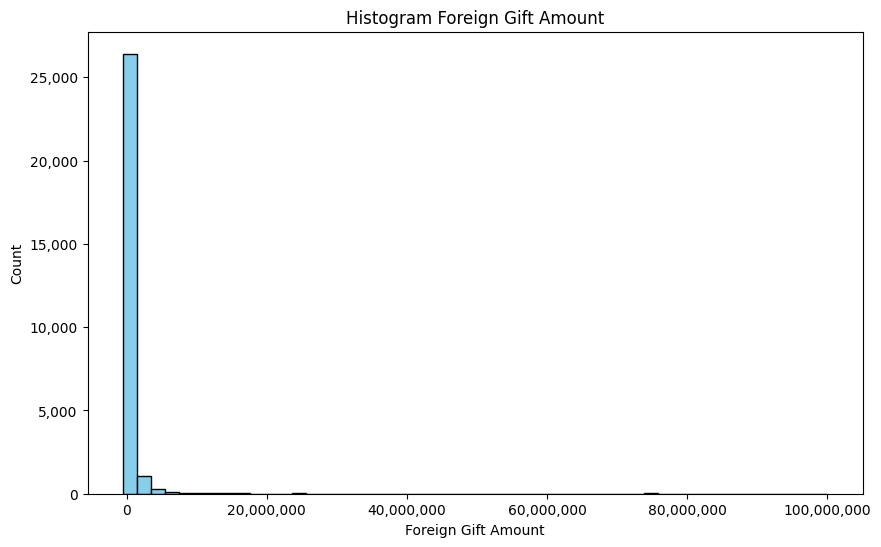

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(foreigngifts['Foreign Gift Amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Count')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.show()


In [7]:
#Describe the variable
foreigngifts.describe()


,ID,OPEID,Foreign Gift Received Date,Foreign Gift Amount
count,28221.00000,2.822100e+04,28221.000000,2.822100e+04
mean,14111.00000,2.487055e+05,42875.689061,5.882327e+05
std,8146.84531,3.009704e+05,641.917904,3.222011e+06
min,1.00000,1.020000e+05,41640.000000,-5.377700e+05
25%,7056.00000,1.315000e+05,42336.000000,5.700000e+03
50%,14111.00000,2.077000e+05,42934.000000,9.461500e+04
75%,21166.00000,2.974000e+05,43466.000000,3.761420e+05
max,28221.00000,4.279700e+06,44012.000000,1.000000e+08


From this, I have several findings. First, the foreign gift amount was not stored as a numeric value, after checking the variable description. This first needed conversion to numeric variable. Second, the histogram needed to be formatted to remove any numbers in scientific notation, as my description of the variable was originally given in scientific notation. From the histogram, we see that most gifts are under 20 million, with an outlier of a minimal number of gifts under 80 million.

**3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?**

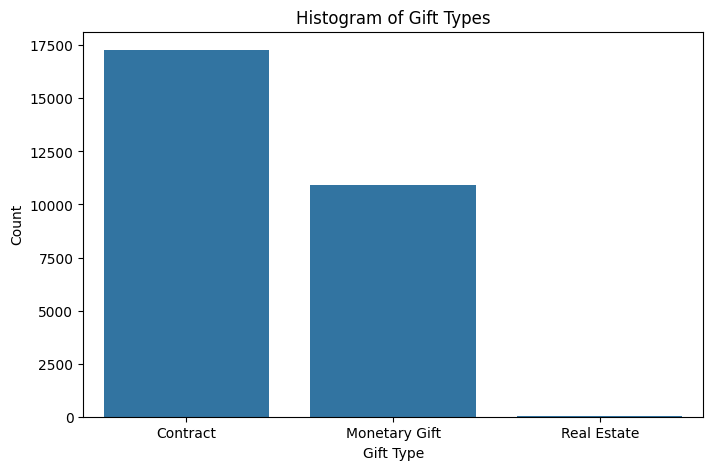

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gift Type', data=foreigngifts, order=foreigngifts['Gift Type'].value_counts().index)
plt.title('Histogram of Gift Types')
plt.xlabel('Gift Type')
plt.ylabel('Count')
plt.show()

In [9]:
gift_counts = foreigngifts['Gift Type'].value_counts(normalize=True)  #find proportions
print(gift_counts)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


61.2% of the gifts are contracts, 38.8% are monetary, and 0.039% are real estate.

**4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?**

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


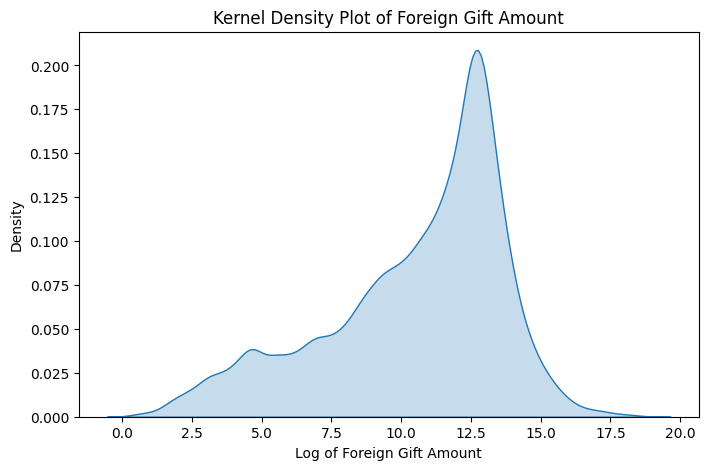

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


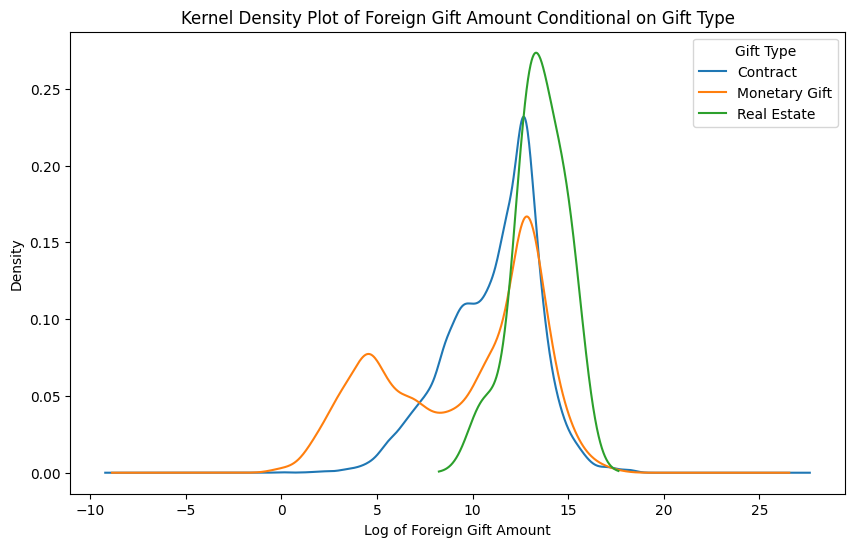

In [14]:
#kernel density plot of log of foreign gift amount
foreigngifts['Foreign_Gift_Log'] = np.log1p(foreigngifts['Foreign Gift Amount'])
plt.figure(figsize=(8, 5))
sns.kdeplot(foreigngifts['Foreign_Gift_Log'], fill=True)
plt.title('Kernel Density Plot of Foreign Gift Amount')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

#kernel density plot of log of foreign gift amount conditional on gift type
plt.figure(figsize=(10, 6))
foreigngifts['Foreign_Gift_Log'] = np.log(foreigngifts['Foreign Gift Amount'])
foreigngifts.groupby('Gift Type')['Foreign_Gift_Log'].plot(kind='kde')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Foreign Gift Amount Conditional on Gift Type')
plt.legend(title='Gift Type')
plt.show()




I notice several patterns from the kernel density plots. First, I see that the first plot skews slightly left, meaning that the distribution is slightly skewed to higher gift amounts. There are many gifts with a foreign gift amount of log of 12.5. When viewing the plot conditional on gift type, I see that the distribution of foreign gift amount varies by gift type. We see that real estate had the highest gift amount with the highest density at the gift amount of around log 13. Monetary gifts had the lowest density and is slighly more varying with two peaks, one skewed right at a gift amount of log 5.

**5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?**


In [15]:
#top 15 countries by number of gifts
top15 = foreigngifts['Country of Giftor'].value_counts().head(15)
print(top15)


Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


In [16]:
#top 15 countries by amount given
top15amount = (
    foreigngifts.groupby('Country of Giftor')['Foreign Gift Amount']
    .sum()
    .sort_values(ascending=False)
    .head(15))
print(top15amount)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


**6.What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.**


In [17]:
#top 15 institutions by amount of money recieved
top_institutions = (
    foreigngifts.groupby('Institution Name')['Foreign Gift Amount']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)
print(top_institutions)



Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


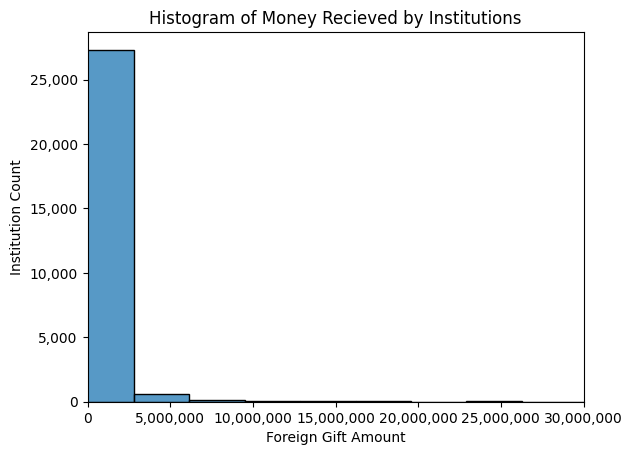

In [51]:
#histogram of institutions by amount of money recieved
sns.histplot(foreigngifts['Foreign Gift Amount'], bins=30, kde=False)
plt.title('Histogram of Money Recieved by Institutions')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Institution Count')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xlim(0, 30000000)
plt.show()


**7. Which giftors provide the most money, in total?**

In [18]:
giftor_amt = foreigngifts.groupby('Giftor Name')['Foreign Gift Amount'].sum()
giftor_amt_sort = giftor_amt.sort_values(ascending=False)
top_10_giftors = giftor_amt_sort.head(10)
print(top_10_giftors)


Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Name: Foreign Gift Amount, dtype: int64


The Qatar Foundation is the giftor that provides the most money, in total. The top 10 giftors are displayed above, by foreign gift amount.

# **Q3.** This question uses the Airbnb data to practice making visualizations.
**bold text**
**1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.**


In [18]:
import requests
import urllib.request
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
airbnb = pd.read_csv('/content/EDA/assignment/data/airbnb_hw.csv', low_memory = False)

***2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data. ***


In [20]:
print(airbnb.shape, '\n')
print(airbnb.head(), '\n')
airbnb.head()

(30478, 13) 

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  10036.0   3.0   

   Number of Records  Number Of Reviews Price  R

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


**3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?**


In [21]:
room_type = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
print(room_type)

room_type_norm = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'], normalize='all')
print(room_type_norm)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

I see a clear pattern in the type of rentals that are available. There are many more "entire home/apt" rentals available for apartments, making up 51.4% compared to other rental types. Additionally, more private room rentals are available for apartments compared to other rental types, 35.27% of rentals. However, the highest number of private room rentals are found within houses (4.13%). For house rentals, renting private rooms are more common than renting the entire property. Other property types with this pattern include treehouse, hut, other, tent, chalet, dorm, and bed & breakfast.  

**4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.**


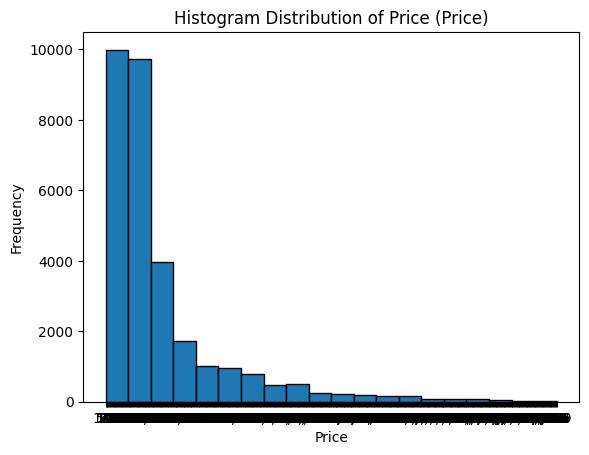

In [22]:
#make histogram
plt.hist(airbnb['Price'], bins=20, edgecolor='black')
plt.title('Histogram Distribution of Price (Price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

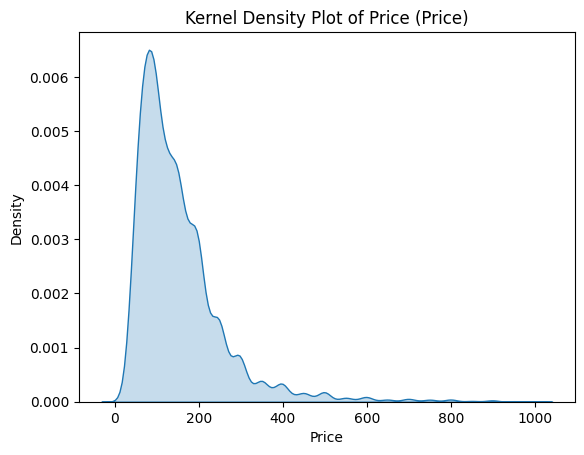

In [55]:
#make kernel density plot
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce')
airbnb = airbnb.dropna(subset=['Price'])
sns.kdeplot(airbnb['Price'], fill=True)
plt.title('Kernel Density Plot of Price (Price)')
plt.xlabel('Price')
plt.show()

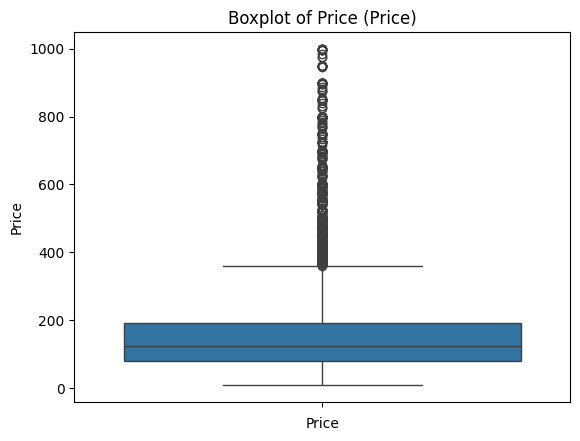

In [56]:
#make boxplot
sns.boxplot(airbnb['Price'])
plt.title('Boxplot of Price (Price)')
plt.xlabel('Price')
plt.show()

In [57]:
#make statistical description
print(airbnb['Price'].describe())

count   30,297
mean       153
std        109
min         10
25%         80
50%        125
75%        192
max        999
Name: Price, dtype: float64


The data is badly scaled. We can see that it is heavily skewed to the right (as shown in the kernel density plot). Additionally, the distribution of price histogram shows that the majority of listings are priced between 0-500 dollars per night. There are several outliers, as displayed on the boxplot of price. For example, there is an outlier listing with a price of nearly $10,000. Logging the price variable will help to make the scale more normalized.

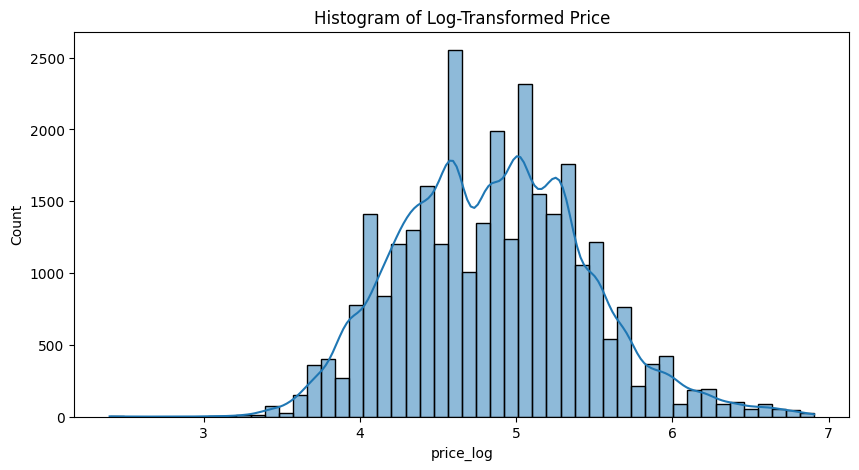

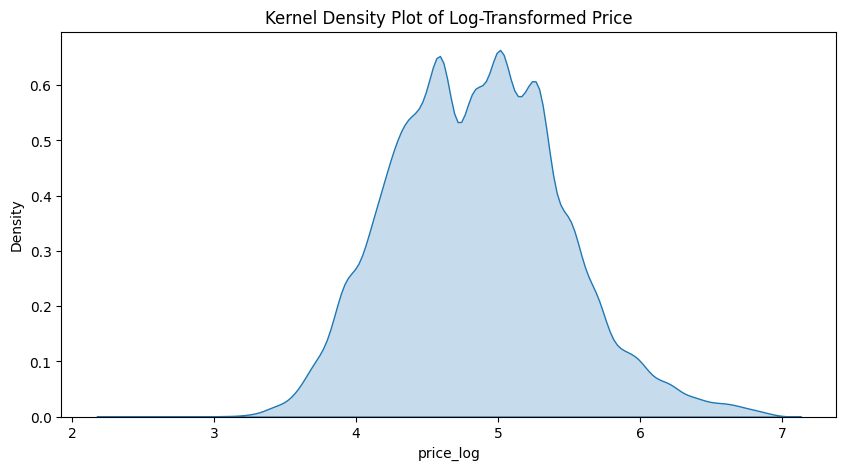

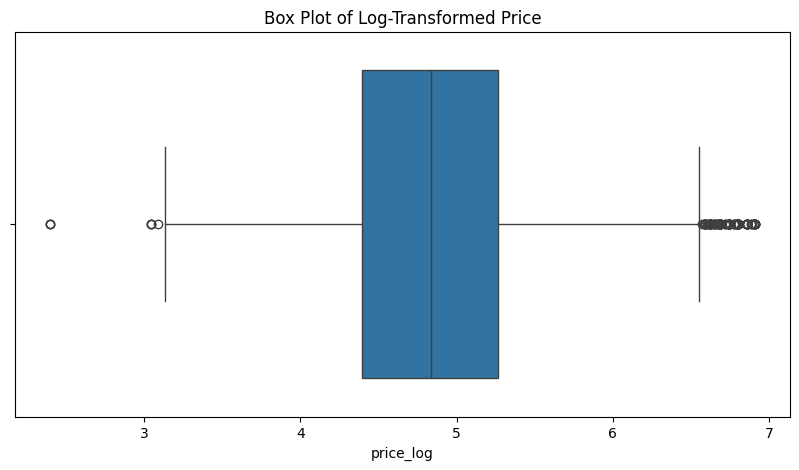

count   30,297
mean         5
std          1
min          2
25%          4
50%          5
75%          5
max          7
Name: price_log, dtype: float64


In [58]:
#Make price variable logged, and try these steps again
airbnb['price_log'] = np.log1p(airbnb['Price'])

#Make histogram with price_log
plt.figure(figsize=(10,5))
sns.histplot(airbnb['price_log'], bins=50, kde=True)
plt.title("Histogram of Log-Transformed Price")
plt.show()

#Make kernel density plot with price_log
plt.figure(figsize=(10,5))
sns.kdeplot(airbnb['price_log'], fill=True)
plt.title("Kernel Density Plot of Log-Transformed Price")
plt.show()

#Make boxplot with price_log
plt.figure(figsize=(10,5))
sns.boxplot(x=airbnb['price_log'])
plt.title("Box Plot of Log-Transformed Price")
plt.show()

#Make statistical description with price_log
print(airbnb['price_log'].describe())


After creating the price_log variable, we see that the data is more normalized. For example, the kernel density plot and histogram show that the distribution is normal, and far less skewed than the original two plots.

**5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.**


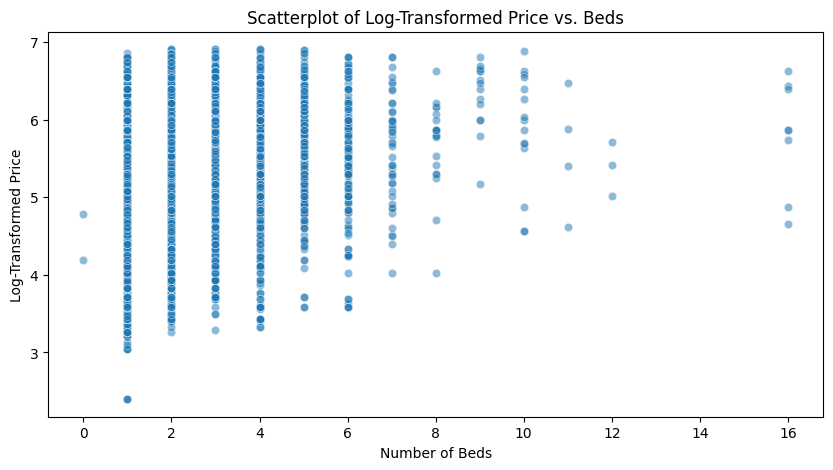

In [59]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=airbnb['Beds'], y=airbnb['price_log'], alpha=0.5)
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.title("Scatterplot of Log-Transformed Price vs. Beds")
plt.show()

From this scatterplot, I see as the number of beds increases, the distribution of prices decreases. For example, there is less variation in the log-transformed price variable when the rooms are about 10 (the price is more centralized around 5/6. However, there is a much greater spread in the log-transformed price variable when the number of beds is lower. For example, when the number of beds is 1 or 2, the spread of log-trasnformed price ranges from ~0-8.

In [28]:
bed_price_stats = airbnb.groupby('Beds')['Price'].describe()
print(bed_price_stats)

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

I see a pattern in the distribution of average price and standard deviation of prices. I see that as bed count increases, there is a general increase in the average price. Additionally, as the average price increases, in general the standard deviation for average price increases. For example, the highest average price (1418 for 12 beds), has the highest standard deviation of price (2388.29).

**6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?**

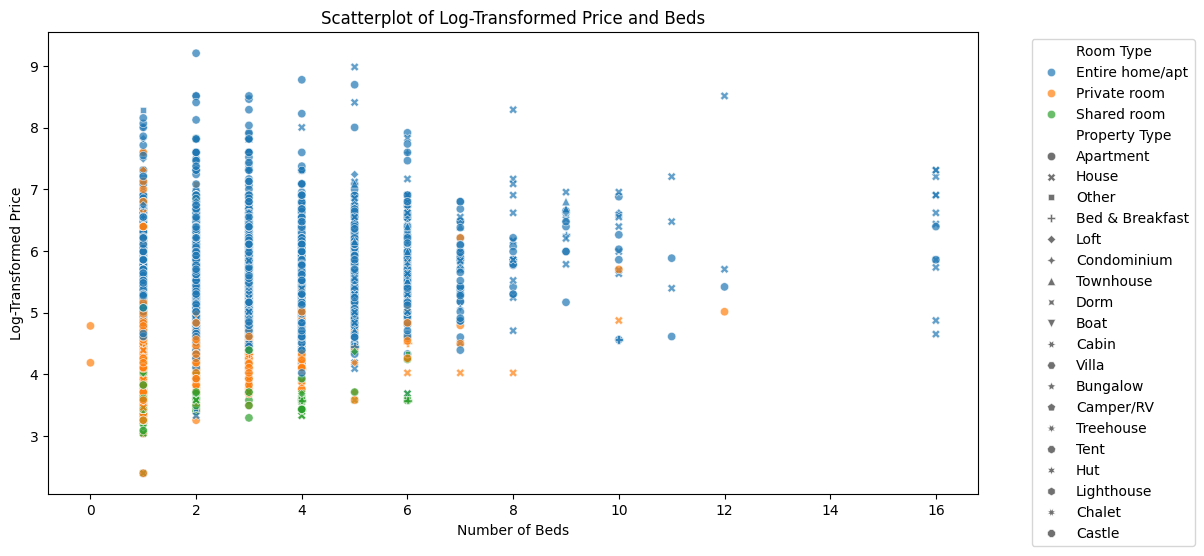

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=airbnb, x='Beds', y='price_log', hue='Room Type', style='Property Type', alpha=0.7)
plt.xlabel("Number of Beds")
plt.ylabel("Log-Transformed Price")
plt.title("Scatterplot of Log-Transformed Price and Beds")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

I see patterns from the scatterplot above. I see that the properties that are houses tend to have a higher number of beds, and a generally higher price. Additionally, the private room rentals tend to have lower prices than the rentals that are an entire home/apt. They also tend to have a lower number of bed count compared to rentals that are an entire home/apt.

In [31]:
room_property_price_stats = airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(room_property_price_stats)

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

After computing a description of `Price` conditional on `Room Type` and `Property Type,' I see several observations. Room type and property type "Entire home/apt and Other" have the highest price on average, with a mean of $843. This may represent luxury homes or other unique rentals. Room type and property type "Entire home/apt and Other" also have the highest standard deviation, of about 1133. Median appears to be a more reliable estimate of central tendency, as many of the standard deviations appear to be large, indicating possible outliers that may influence and sway the mean. However, utilizing median, "Entire home/apt and Other" still has the highest price of 300.


**7.We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?**

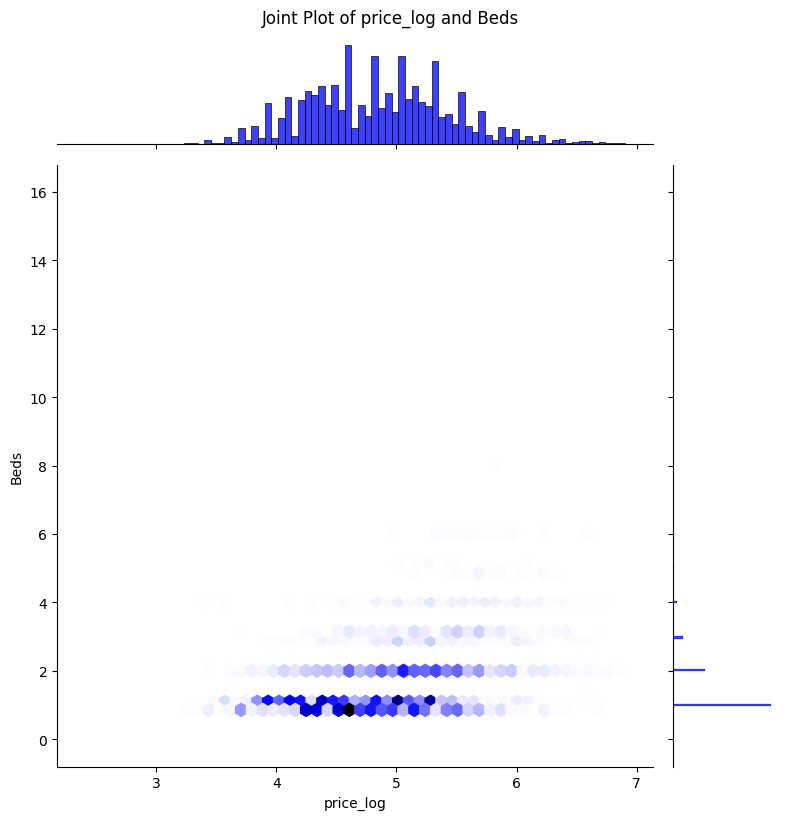

In [62]:
sns.jointplot(data=airbnb, x='price_log', y='Beds', kind='hex', color='blue', height=8)
plt.suptitle('Joint Plot of price_log and Beds', y=1.02)
plt.show()



The data is actually distributed with a log price of between 4-5.5, and with 2 or less bedrooms. This gives us more clarity on plots in 5 and 6, which were messier/more chaotic. It was more difficult in these plots to see which prices were the most concentrated, as the scatterplots had a vast spread of prices from log 3 to log 8. This plot makes it easier to see that the actual concentration of prices is more centered at 4-5, and the number of bedrooms is more concentrated lower at 2 or under.